## Homework #5. Exploratory Data Analysis
#### Author: `Anton Pysmennyi`
#### Total time spent on h/w (in minutes): `~720`

## List of questions I want to answer:

#### 1. How did the average length of my messages change over time? x
#### 2. How was the average lenght of my text messages influenced by the length of messages sent to me? x
#### 3. How do the average lenghts of my text messages, messages sent to me and the messages of others differ? x
#### 4. How was the average lenght of my voice messages influenced by the length of messages sent to me? x
#### 5. How do the average lenghts of my voice messages, messages sent to me and the messages of others differ? x
#### 6. How did the ammount of Ukrainian in my messages change over time (can be seen by some unique letters in messages) x 
#### 7. How did the ammount of Ukrainian in my recieved messages and in channels influenced my switch to Ukrainian? x
#### 8. How did the average ammount of punctuation change in my messages over time (it can help me see when I give up on grammar) х
#### 9. How does grammar depend on ammount of messages in the chat? х
#### 10. How does the grammar (again, ammount of punctuation) standarts depend on ammount of people in the chat? x
#### 11. In which hours I am the most active in Telegram? x 
#### 12. How does my activity in Telegram differ from the activity of other people? x 
#### 13. What did I forward more: texts or photos? By how much? x 
#### 14. What did people forward to me more: texts or photos? By how much? x
#### 15. How does time of the day affect the ratio of voice and text messages sent? x 
#### 16. Top 10 chats by the overal length of all voice messages I've sent. How many of them are private, how many are groups? x
#### 17. How many people are in groups from this top 10 is there any clear corellation between number of people and quantity of voice messages? x
#### 18. What is the biggest ammount of chats I have in common with someone? х
#### 19. How does the ammount of chats with both me and the person affect the ammount of messages in our private chat?
#### 20. How many people actually use the 'lastname' field in their profile? x


# The work itself 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DIALOGS_MERGED_DATA_PATH = "Enter the path to dialogs_data_all.csv file here"
DIALOGS_META_MERGED_DATA_PATH = "Enter the path to dialogs_users_all.csv file here"

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [4]:
user_id= "Enter your user id here"
peer_user_id = "PeerUser(user_id="+user_id+")"
timezone = 'Enter your timezone here'

#### P.S. List of all the timezones values: 

In [9]:
import pytz
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

### 1-2.Length of messages over time

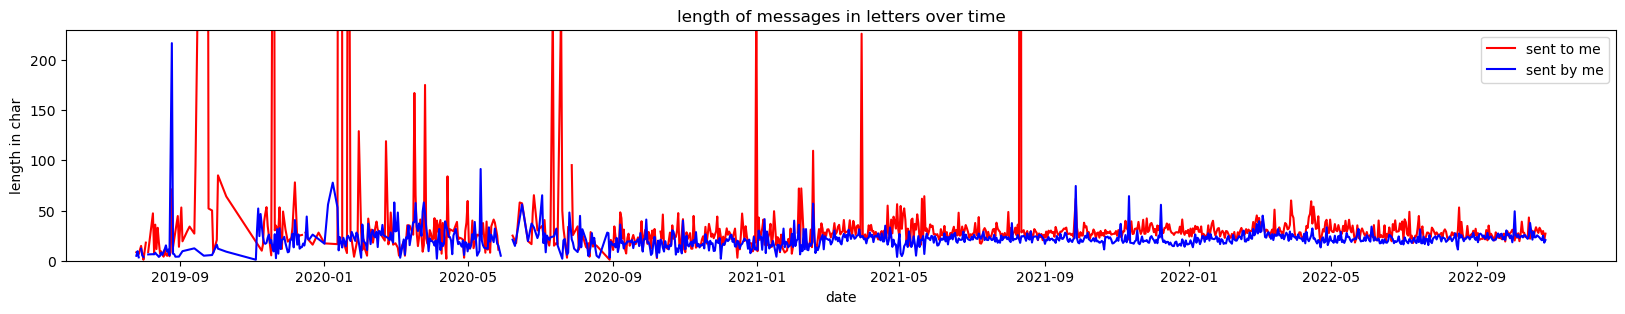

In [5]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['mslen'] = df['message'].str.len()
df2 = df.loc[df["type"]=="text"]
df3 = df2.loc[df2["from_id"]==peer_user_id]
df4 = df2.loc[df2["to_id"]==user_id]
df1 = df3.groupby(['date1'])['mslen'].mean()
df1.name = 'sent by me'
df5 = df4.groupby(['date1'])['mslen'].mean()
df5.name = "sent to me"
ax1 = df5.plot(figsize=(20,3), color='red')
ax1.set_ylim(0, 230)
ax2 = df1.plot(figsize=(20,3), color='blue',xlabel = 'date',ylabel = 'length in char', title="length of messages in letters over time")
ax2.set_ylim(0, 230)
plt.legend()

##### From the graph we can clearly see that the older I get, the shorter the messages get. Possible reasons: lack of time, positive changes in my self-esteem (I no longer care that hard about what people think of me, so I don't spend time on formalities)

##### We can see that I usually send longer voice messages than the ones sent to me.

### 2-3. Average message length overal

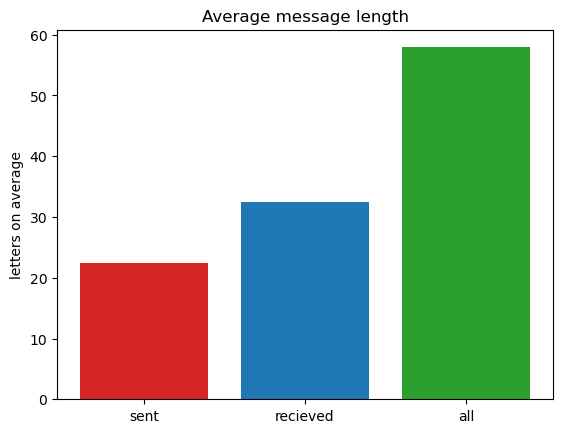

In [6]:
df['mslen'] = df['message'].str.len()
df0 = df.loc[df['type']=='text']
df1 = df0.loc[df0["from_id"]==peer_user_id]
df2 = df0.loc[df0["to_id"]==user_id]
fig, ax = plt.subplots()
message_types = ['sent','recieved', 'all']
counts = [df1['mslen'].mean(), df2['mslen'].mean(), df0['mslen'].mean()]
bar_labels = ['red', 'blue', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
ax.bar(message_types, counts, label=bar_labels, color=bar_colors)
ax.set_title('Average message length')
ax.set(ylabel = "letters on average")
plt.show()

##### Here we can see that I've sent much more short messages than the long ones, which combined with the plot 1 shows that overal my usage of telegram became more active throughout the years

### 4-5. Average voice message duration

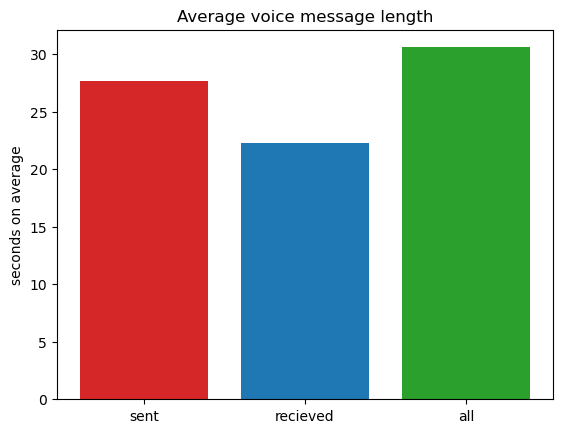

In [7]:
fig, ax = plt.subplots()
message_types = ['sent','recieved', 'all']
df0 = df.loc[df['type']=='voice']
df1 = df0.loc[df0["from_id"]==peer_user_id]
df2 = df0.loc[df0["to_id"]==user_id]
counts = [df1['duration'].mean(), df2['duration'].mean(), df0['duration'].mean()]
bar_labels = ['red', 'blue', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
ax.bar(message_types, counts, label=bar_labels, color=bar_colors)
ax.set_title('Average voice message length')
ax.set_ylabel('seconds on average')
plt.show()

### 6-7. Quantity of messages that contain Ukrainian letter 'i' over time 

#### 1. Messages sent to me or by me

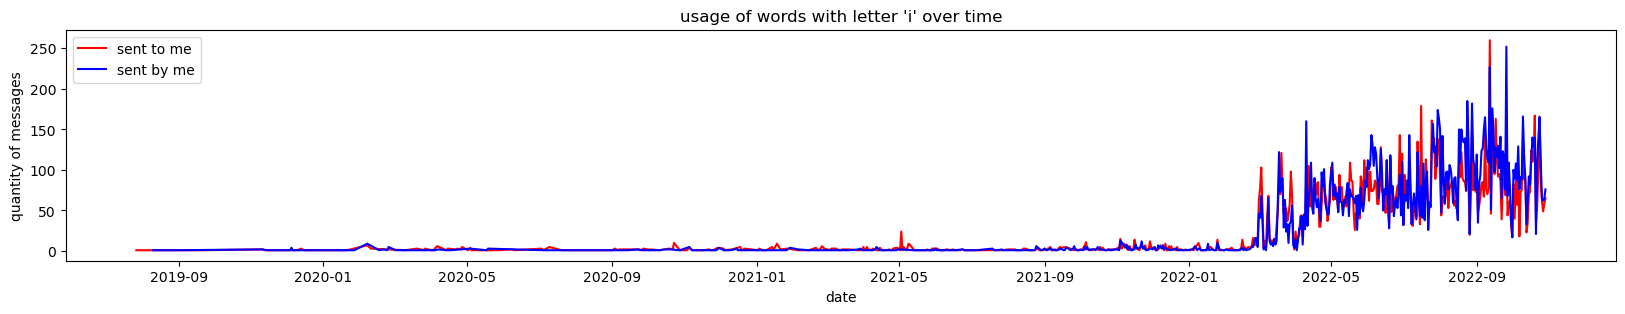

In [8]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['ukr'] = df['message'].str.contains("і")
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df1['ukr']==1]
df3 = df2.groupby(['date1'])['message'].count()
df4 = df.loc[df["to_id"]==user_id]
df5 = df4.loc[df4['ukr']==1]
df6 = df5.groupby(['date1'])['message'].count()

df6.name = "sent to me"
df3.name = "sent by me"
df6.plot(figsize=(20,3), color = 'red')
df3.plot(figsize=(20,3), color='blue', xlabel = 'date',ylabel = 'quantity of messages',title="usage of words with letter 'i' over time")
plt.legend()

##### Here we can see that only when people started to write to me in Ukrainian a lot (around that time my gf switched to Ukrainian completely, probably, that's the case), I've started using Ukrainian regularly

#### 2.Global tendency in my chats compared to the previous two:

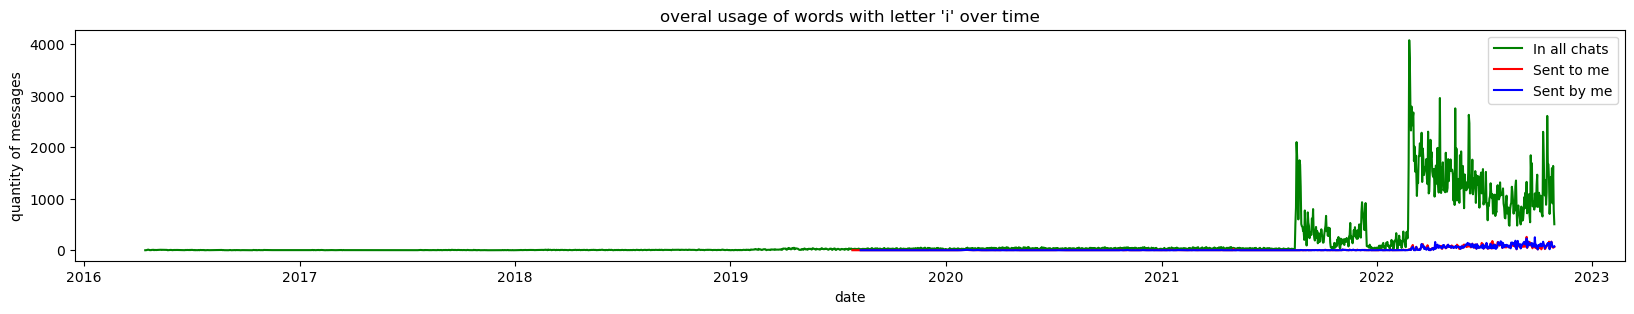

In [9]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['ukr'] = df['message'].str.contains("і")
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df1['ukr']==1]
df3 = df2.groupby(['date1'])['message'].count()
df4 = df.loc[df["to_id"]==user_id]
df5 = df4.loc[df4['ukr']==1]
df6 = df5.groupby(['date1'])['message'].count()
df7 = df.loc[df['ukr']==1]
df8 = df7.groupby(['date1'])['message'].count()
df8.name = "In all chats"
df6.name = "Sent to me"
df3.name = 'Sent by me'
df8.plot(figsize=(20,3), color = 'green')
df6.plot(figsize=(20,3), color = 'red')
df3.plot(figsize=(20,3), color='blue', xlabel = 'date',ylabel = 'quantity of messages',title="overal usage of words with letter 'i' over time")
plt.legend()

##### Here, once again, we can see how drastically quantity of Ukrainian increased in my chats when I came to the Academy and how it didn't affect my private messages at all (p.s. I deliberately chose this scale just to show you the ammount of Ukrainian messages in my chat)


### 8.Quantity of different punctuation in my messages over time

Text(0.5, 1.0, 'quantity of punctuation in messages over time')

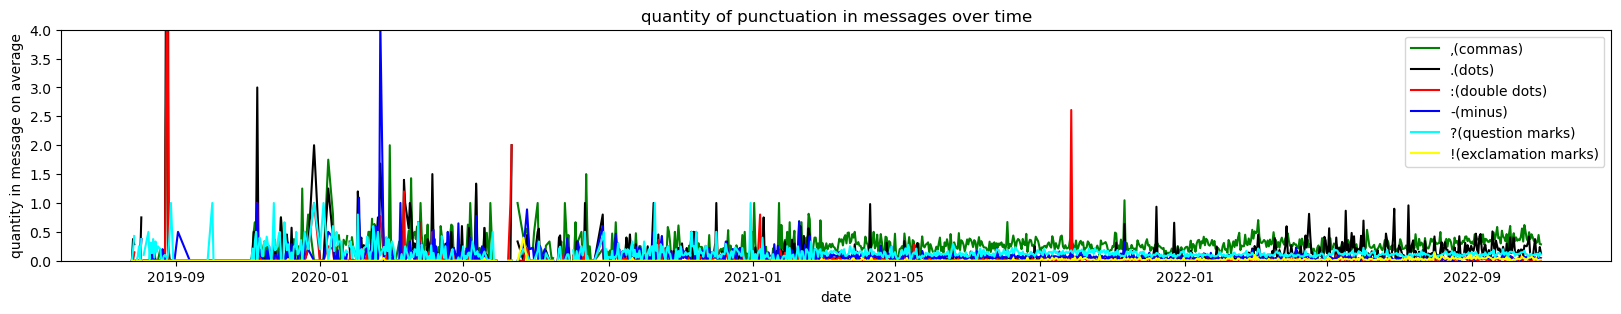

In [10]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['commacount'] = df['message'].str.count('\,')
df['dotcount'] = df['message'].str.count('\.')
df['twodotcount']= df['message'].str.count('\:')
df['minuscount']= df['message'].str.count('\-')
df['questioncount']= df['message'].str.count('\?')
df['excmcount'] =df['message'].str.count('\!')
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.groupby(['date1'])['commacount'].mean()
df3 = df1.groupby(['date1'])['dotcount'].mean()
df4 = df1.groupby(['date1'])['twodotcount'].mean()
df5 = df1.groupby(['date1'])['minuscount'].mean()
df6 = df1.groupby(['date1'])['questioncount'].mean()
df7 = df1.groupby(['date1'])['excmcount'].mean()
df2.name = ",(commas)"
df3.name = ".(dots)"
df4.name = ":(double dots)"
df5.name = "-(minus)"
df6.name = '?(question marks)'
df7.name = '!(exclamation marks)'
ax2 = df2.plot(figsize=(20,3), color = 'green')
ax3 = df3.plot(figsize=(20,3), color = 'black')
ax4 = df4.plot(figsize=(20,3), color = 'red')
ax5 = df5.plot(figsize=(20,3), color = 'blue')
ax6 = df6.plot(figsize=(20,3), color = 'cyan')
ax7 = df7.plot(figsize=(20,3), color = 'yellow',xlabel = 'date',ylabel = 'quantity in message on average')

ax2.set_ylim(0, 4)
ax3.set_ylim(0, 4)
ax4.set_ylim(0, 4)
ax5.set_ylim(0, 4)
ax6.set_ylim(0, 4)
ax7.set_ylim(0, 4)
plt.legend()
plt.title("quantity of punctuation in messages over time")


##### I've given such an a quantity of plots to show you that the if i change the ammount of punctuation I use, it usually changes for all types of punctuation. 

### 9. Quantity of punctuation in my messages related to ammount of messages in dialog

(0.0, 10.0)

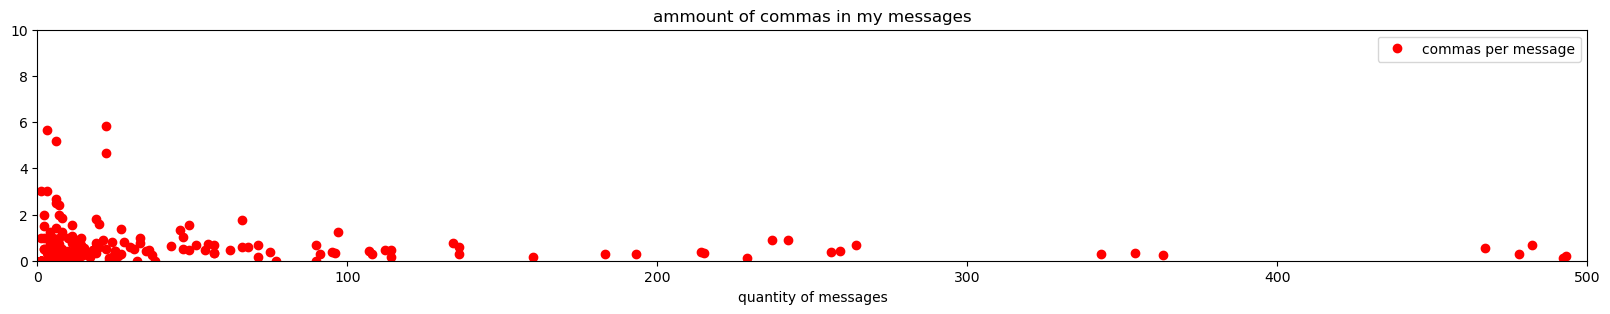

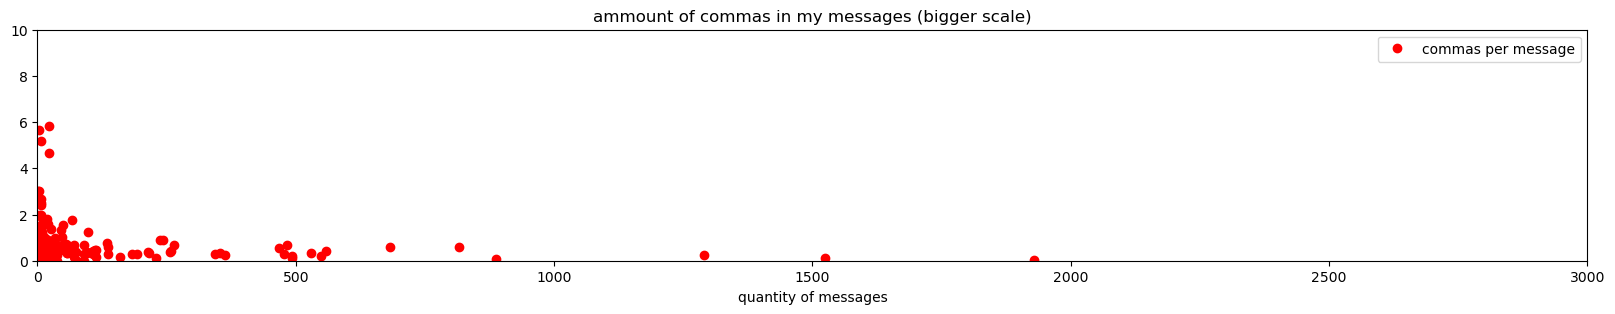

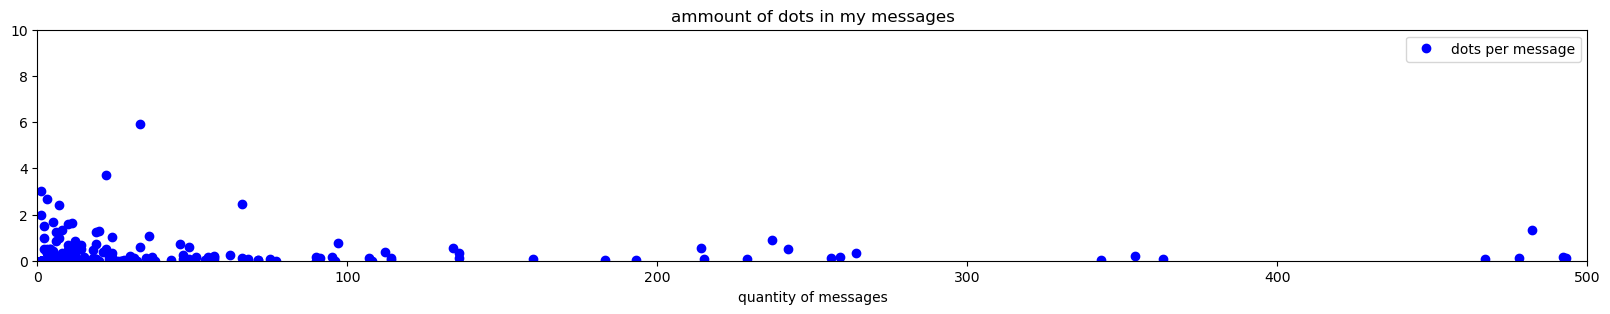

In [11]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['commacount'] = df['message'].str.count('\,')
df['dotcount'] = df['message'].str.count('\.')
df1 = df.loc[df["from_id"]==peer_user_id]

df2 = df1.groupby(['dialog_id'])['commacount'].mean()
df3 = df1.groupby(['dialog_id'])['dotcount'].mean()

df8 = df1.groupby(['dialog_id'])['id'].count()

frame1 = {'quantity of messages': df8, 'commas per message': df2}
frame2 = {'quantity of messages': df8, 'dots per message' : df3}
df00 = pd.DataFrame(frame1)
df01 = pd.DataFrame(frame2)


ax1 = df00.plot(figsize=(20, 3), x='quantity of messages', y='commas per message', title = 'ammount of commas in my messages', color='red', style='o')
ax1.set_xlim(0, 500)
ax1.set_ylim(0, 10)
ax01 = df00.plot(figsize=(20, 3), x='quantity of messages', y='commas per message',title  = 'ammount of commas in my messages (bigger scale)', color='red', style='o')
ax01.set_xlim(0, 3000)
ax01.set_ylim(0, 10)
ax2 = df01.plot(figsize=(20, 3), x='quantity of messages', y='dots per message', title = 'ammount of dots in my messages', color='blue', style='o')
ax2.set_xlim(0, 500)
ax2.set_ylim(0, 10)


##### Here we can see how the ammount of punctuation decreases once I start speaking more with the person. I get to know them, I stop caring about making an appearance

### 10. Quantity of punctuations in my messages related to the ammount of people in chat

(0.0, 10.0)

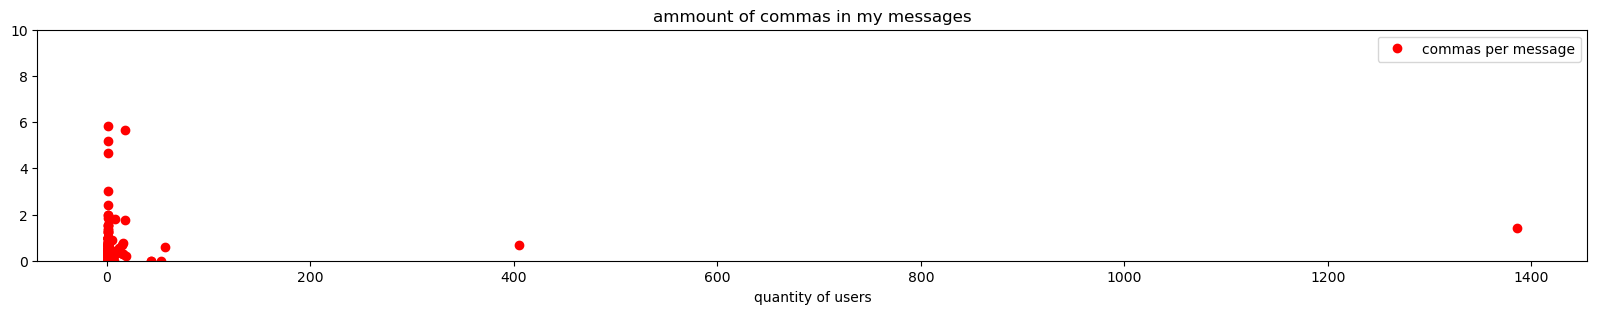

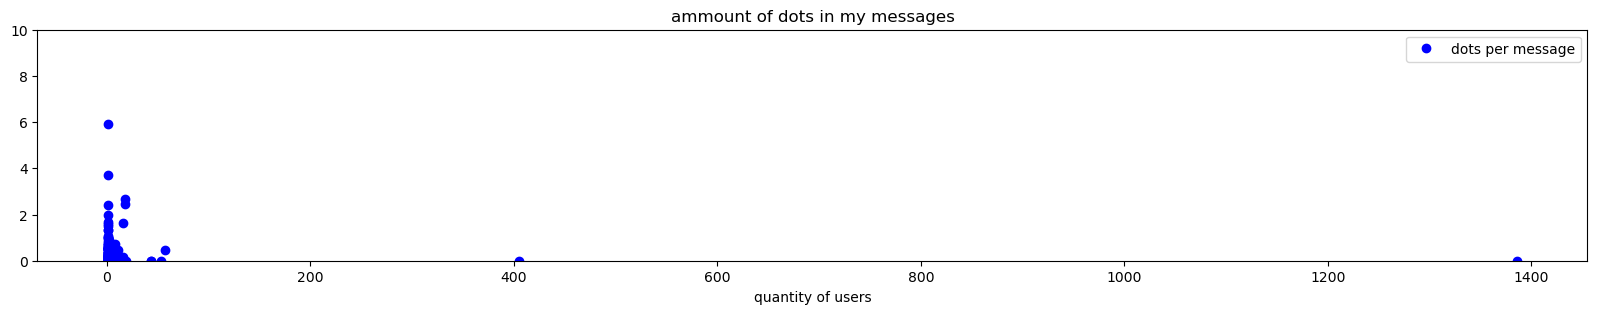

In [12]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['commacount'] = df['message'].str.count('\,')
df['dotcount'] = df['message'].str.count('\.')
df1 = df.loc[df["from_id"]==peer_user_id]

df2 = df1.groupby(['dialog_id'])['commacount'].mean()
df3 = df1.groupby(['dialog_id'])['dotcount'].mean()

df8 = df_meta.groupby(['dialog_id'])['users'].count()

frame1 = {'quantity of users': df8, 'commas per message': df2}
frame2 = {'quantity of users': df8, 'dots per message' : df3}
df00 = pd.DataFrame(frame1)
df01 = pd.DataFrame(frame2)


ax1 = df00.plot(figsize=(20, 3), x='quantity of users', y='commas per message',title = 'ammount of commas in my messages', color='red', style='o')

ax1.set_ylim(0, 10)
ax2 = df01.plot(figsize=(20, 3), x='quantity of users', y='dots per message',title = 'ammount of dots in my messages', color='blue', style='o')

ax2.set_ylim(0, 10)

##### No specific tendencies found. I am, in fact surprised, as I've expected to see more punctuation in groups

### 11-12 Distribution of messages by hours


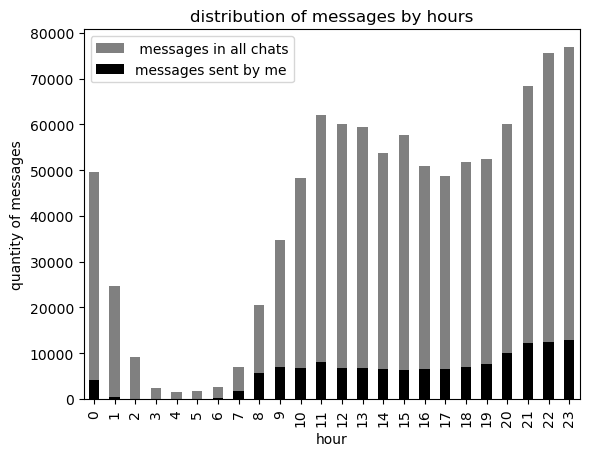

In [13]:
df['hour'] = pd.to_datetime(df['date']).dt.tz_convert(timezone).dt.hour
df1 = df.loc[df["from_id"]==peer_user_id]
df4 = df1.groupby(['hour'])['message'].count()
df5 = df.groupby(['hour'])['message'].count()
df5.name = " messages in all chats"
df4.name = 'messages sent by me'
df5.plot(kind = 'bar', color = 'grey', title = "distribution of messages by hours")
df4.plot(kind = 'bar', color = 'black',  ylabel='quantity of messages')
plt.legend()

##### Here we can see that overal tendencies are quite similar, however, I don't have the drop in activity on the evening peak hours, when pople are going home from work/studying/have a life, unlike me. We can also see that I'm much less active at night (0:00 - 1:00)

### 13-14. Forwarded texts to forwarded photos quantity comparison

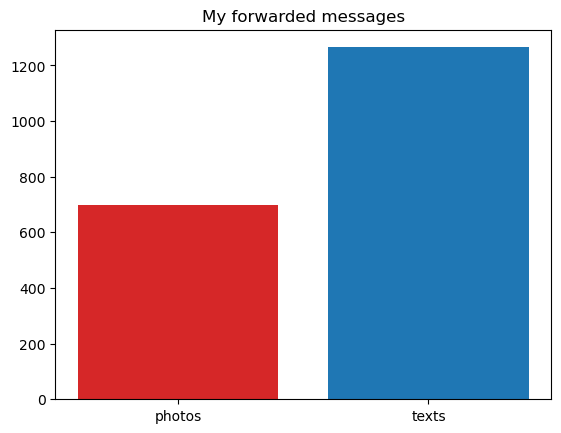

In [14]:
df1 = df.loc[df['from_id']==peer_user_id]
df2 = df1.loc[df['fwd_from'].notnull()]
df3 = df2.loc[df['type']=='photo']
df4 = df2.loc[df['type']=='text']
values = [len(df3), len(df4)]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
values_desc = ['photos', 'texts']
fig, ax = plt.subplots()
ax.bar(values_desc, values, label=bar_labels, color=bar_colors)
ax.set_title('My forwarded messages')
plt.show()

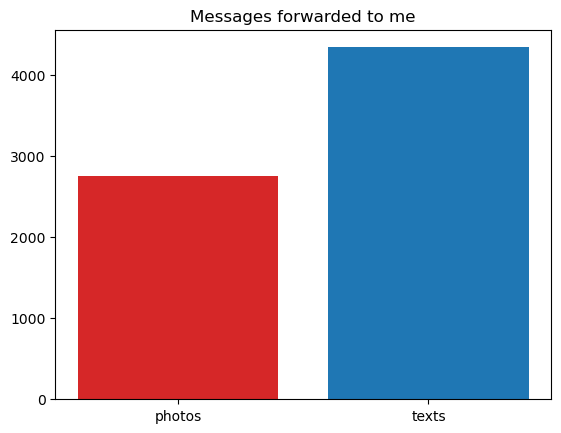

In [15]:
df1 = df.loc[df['to_id']==user_id]
df2 = df1.loc[df['fwd_from'].notnull()]
df3 = df2.loc[df['type']=='photo']
df4 = df2.loc[df['type']=='text']
values = [len(df3), len(df4)]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
values_desc = ['photos', 'texts']
fig, ax = plt.subplots()
ax.bar(values_desc, values, label=bar_labels, color=bar_colors)
ax.set_title('Messages forwarded to me')
plt.show()

##### Here we can clearly see that much more texts are forwarded to me and by me than photos. I am once again surprised, as some of my friends send me pictures only.

### 15.Ratio of voice and text messages throughout the day

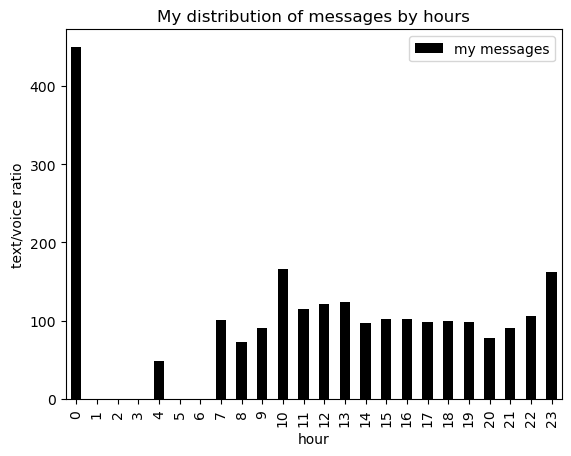

In [16]:
df['hour'] = pd.to_datetime(df['date']).dt.tz_convert(timezone).dt.hour
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df['type']=='text']
df3 = df1.loc[df['type']=='voice']
df4 = df2.groupby(['hour'])['id'].count()
df5 = df3.groupby(['hour'])['id'].count()
df4['text/voice ratio'] = df4/df5
df6 = df4['text/voice ratio']
df6.name = 'my messages'
df6.plot(kind='bar', color = 'black', ylabel='text/voice ratio', title='My distribution of messages by hours')
plt.legend()



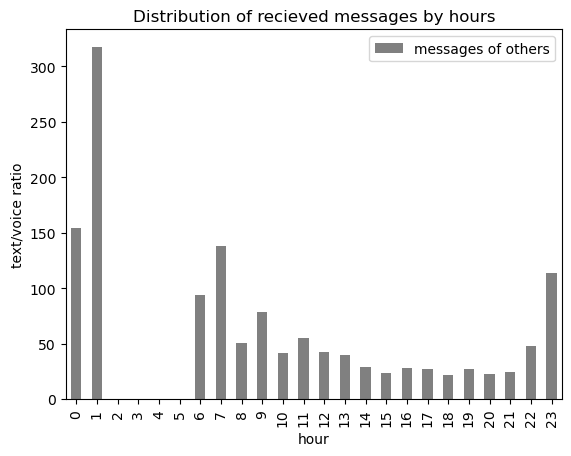

In [17]:
df6 = df.loc[df["to_id"]==user_id]
df7 = df6.loc[df['type']=='text']
df8 = df6.loc[df['type']=='voice']
df9 = df7.groupby(['hour'])['id'].count()
df10 = df8.groupby(['hour'])['id'].count()
df9['text/voice ratio'] = df9/df10
df11 = df9['text/voice ratio']
df11.name = 'messages of others'
df11.plot(kind='bar', color = 'grey', ylabel='text/voice ratio', title = 'Distribution of recieved messages by hours')
plt.legend()

##### Here we can clearly see the difference. The ratio is bigger for me.

### 16-17. Top-10 chats by overal length of my voice messages

Text(0.5, 1.0, 'Types of top-10 chats by voice message overal length')

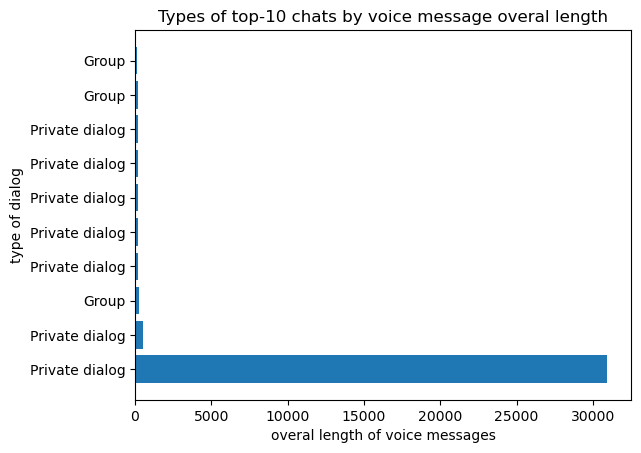

In [18]:
df1 = df.loc[df['from_id'] == peer_user_id]
df6 = df1.loc[df['type']=='voice']

df2 = df6.groupby(['dialog_id'])['duration'].sum().sort_values(ascending=False).head(11)
df3 = pd.merge(df2, df_meta,on=['dialog_id'])
df3 = df3.drop_duplicates(subset=['dialog_id'], keep='first')
df3 = df3.reset_index(drop='True')
fig, ax = plt.subplots()
plt.yticks(range(len(df3['type'])), df3['type'])
plt.barh(range(len(df3['type'])),df3['duration'])
plt.xlabel('overal length of voice messages')
plt.ylabel('type of dialog')
plt.title("Types of top-10 chats by voice message overal length")


##### I was actually surprised to see any groups there. Let's see, how many people are in those groups, because it is usually less comfortable to send voice messages to the chats, where there are many people

<AxesSubplot:title={'center':'Quantity of people in top-10 chats by msg lngth'}, xlabel='duration', ylabel='quantity of people'>

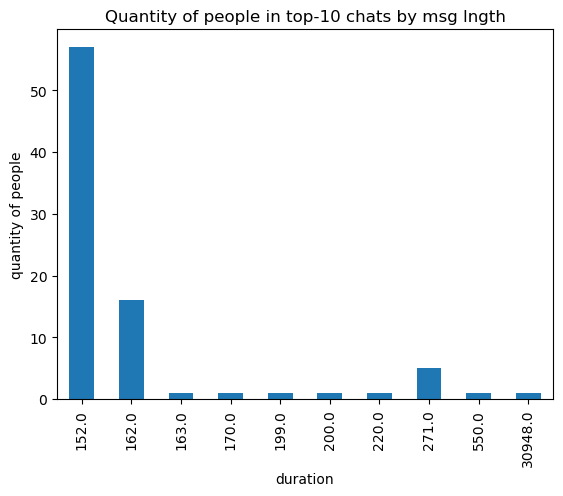

In [19]:
df1 = df.loc[df['from_id'] == peer_user_id]
df6 = df1.loc[df['type']=='voice']

df2 = df6.groupby(['dialog_id'])['duration'].sum().sort_values(ascending=False).head(11)
df3 = pd.merge(df2, df_meta,on=['dialog_id'])
df3 = df3.reset_index(drop='True')
df3 = df3.groupby(['duration'])['users'].count()
df3.plot(kind = 'bar', ylabel='quantity of people', y='duration', title = 'Quantity of people in top-10 chats by msg lngth')


##### The tendency is evident. I don't like display anything private, even my voice, in big chats

### 18.The biggest ammount of chats that I have in common with someone

In [20]:
df_meta.groupby(['users'])['dialog_id'].count().sort_values(ascending=False)[1]

18

##### I thought that there would be less common chats

### 19.Correlation between the ammount of messages in private chat and groups in common

<AxesSubplot:title={'center':'Corelation between quantity of messages and quantity of chats in common'}, xlabel='quantity of chats in common', ylabel='quantity of messages'>

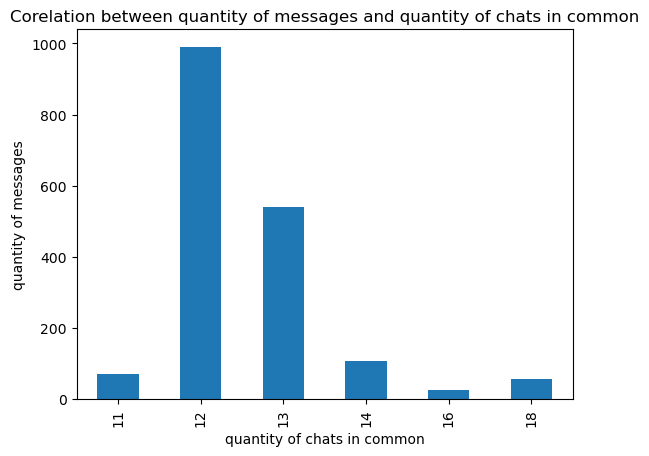

In [21]:
import json
from ast import literal_eval
from pandas.io.json import json_normalize

df0 = pd.json_normalize(df_meta['users'].apply(literal_eval))
dfn = pd.concat([df_meta[['dialog_id', 'name', 'type']],df0], axis = 1)
df1 = dfn.groupby(['user_id'])['dialog_id'].count().sort_values(ascending=False).iloc[1:11]
df2 = pd.merge(df, df1,left_on=['dialog_id'], right_on=['user_id'])
df4 = df2.groupby(['dialog_id_y'])['id'].count()
df4.plot(kind = 'bar', ylabel='quantity of messages',title = 'Corelation between quantity of messages and quantity of chats in common',xlabel='quantity of chats in common', y = 'dialog_id_y', x = 'dialog_id_x')






##### It is evident that there is no corelation between amount of messages and amount of chats in common

### 20 How many people have lastname in Telegram

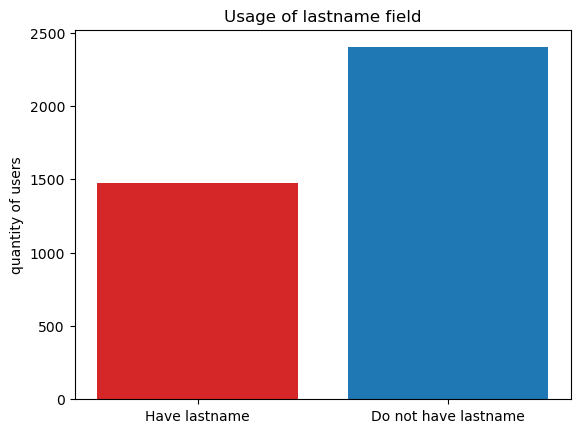

In [22]:
df0 = pd.json_normalize(df_meta['users'].apply(literal_eval))
df01 = df0.loc[df0['last_name'].notnull()]
df02 = df0.loc[df0['last_name'].isnull()]
values = [len(df01), len(df02)]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
values_desc = ['Have lastname', 'Do not have lastname']
fig, ax = plt.subplots()
ax.bar(values_desc, values, label=bar_labels, color=bar_colors)
plt.title('Usage of lastname field')
plt.ylabel('quantity of users')
plt.show()

##### The graph shows that most people don't use this field at all 

### Conclusion

##### This work made me understand how much data you can extract out of datasets of relatively small variety of information. It also made me understand that quite a lot of my beliefs about my behaviour and behaviour of others in Telegram are false.

# Homework 6 - Improve behaviour exploration

### 0. Cosmetic changes were applied to the graphs from previous hometask: added proper legends and titles, etc.

### 1. Purpose of usage of English in texts in TG

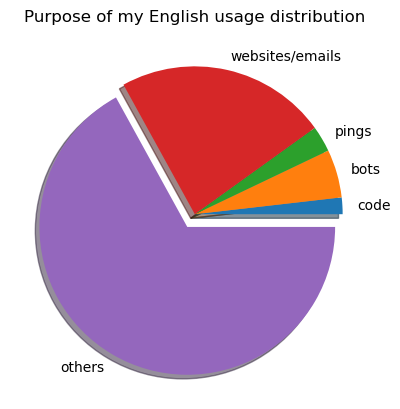

In [8]:
df['eng'] = df.message.str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|v|w|x|y|z')
df['bot_indicator'] = df.message.str.match('/start')
df['code'] = df.message.str.contains('{|}|<|>|cd')
df['potential_ping'] = df.message.str.contains('@')
df['email/website'] = df.message.str.contains('.com|.net|.ua')
df['ping']=df['potential_ping']&(df['email/website']==False)
s1 = df.groupby(['dialog_id'])['bot_indicator'].max()
s1.name = 'isbot'
df0 = df.loc[df['from_id']==peer_user_id]
df1 = pd.merge(df0, s1, on=['dialog_id'])
df2 = df1.loc[df1['eng']==True]
mall = df2['id'].count()


mbot = df2.loc[df2['isbot']==True]['id'].count()
mping = df2.loc[df2['ping']==True]['id'].count()
msite = df2.loc[df2['email/website']==True]['id'].count()
mcode = df2.loc[df2['code']==True]['id'].count()
mothers = df2.loc[(df2['code']==False)&(df2['ping']==False)&(df2['isbot']==False)&(df2['email/website']==False)]['id'].count()

fig, ax = plt.subplots()
message_types = ['code','bots','pings','websites/emails','others']
counts = [mcode, mbot, mping,msite, mothers]
explode = (0, 0, 0, 0, 0.1)
ax.pie(counts, labels=message_types,explode=explode, shadow=True)
ax.set_title('Purpose of my English usage distribution')
plt.show()



##### I am surprised to see so many regular texts in English, even more than the links. Let's check the overal tendencies:

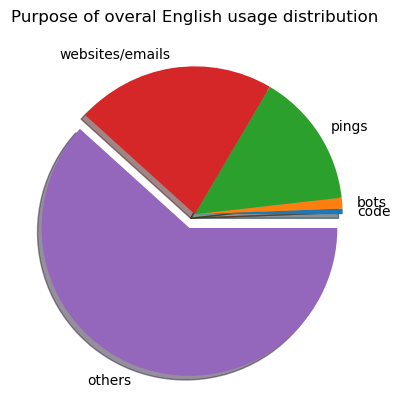

In [5]:
df['eng'] = df.message.str.contains('a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|v|w|x|y|z')
df['bot_indicator'] = df.message.str.match('/start')
df['code'] = df.message.str.contains('{|}|<|>|cd')
df['potential_ping'] = df.message.str.contains('@')
df['email/website'] = df.message.str.contains('.com|.net|.ua')
df['ping']=df['potential_ping']&(df['email/website']==False)
s1 = df.groupby(['dialog_id'])['bot_indicator'].max()
s1.name = 'isbot'
df0 = df
df1 = pd.merge(df0, s1, on=['dialog_id'])
df2 = df1.loc[df1['eng']==True]
mall = df2['id'].count()


mbot = df2.loc[df2['isbot']==True]['id'].count()
mping = df2.loc[df2['ping']==True]['id'].count()
msite = df2.loc[df2['email/website']==True]['id'].count()
mcode = df2.loc[df2['code']==True]['id'].count()
mothers = df2.loc[(df2['code']==False)&(df2['ping']==False)&(df2['isbot']==False)&(df2['email/website']==False)]['id'].count()

fig, ax = plt.subplots()
message_types = ['code','bots','pings','websites/emails','others']
counts = [mcode, mbot, mping,msite, mothers]
explode = (0, 0, 0, 0, 0.1)
ax.pie(counts, labels=message_types,explode=explode, shadow=True)
ax.set_title('Purpose of overal English usage distribution')
plt.show()




##### The result is quite similar

### 2. Distribution of text/voice ratio graph with overlapping to show the difference better:

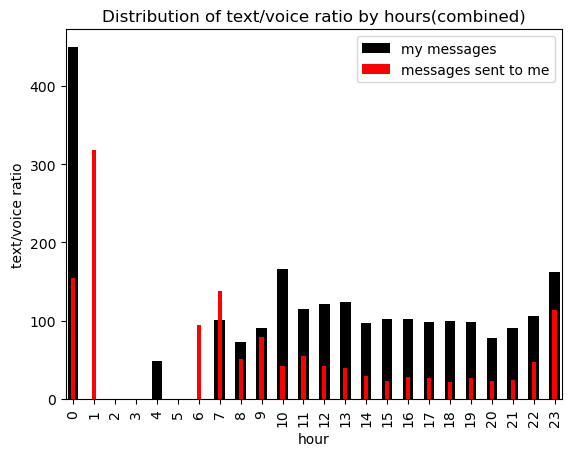

In [25]:
df['hour'] = pd.to_datetime(df['date']).dt.tz_convert(timezone).dt.hour
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df['type']=='text']
df3 = df1.loc[df['type']=='voice']
df4 = df2.groupby(['hour'])['id'].count()
df5 = df3.groupby(['hour'])['id'].count()
df4['text/voice ratio'] = df4/df5
df6 = df4['text/voice ratio']
df6.name = 'my messages'
df6.plot(kind='bar', color = 'black', ylabel='text/voice ratio', title = 'Distribution of text/voice ratio by hours(combined)')
df06 = df.loc[df["to_id"]==user_id]
df7 = df06.loc[df['type']=='text']
df8 = df06.loc[df['type']=='voice']
df9 = df7.groupby(['hour'])['id'].count()
df10 = df8.groupby(['hour'])['id'].count()
df9['text/voice ratio'] = df9/df10
df11 = df9['text/voice ratio']
df11.name = 'messages sent to me'
df11.plot(kind='bar', color = 'red',width=0.2, ylabel='text/voice ratio')
plt.legend()

### 3. Usage of letter "ы" over time

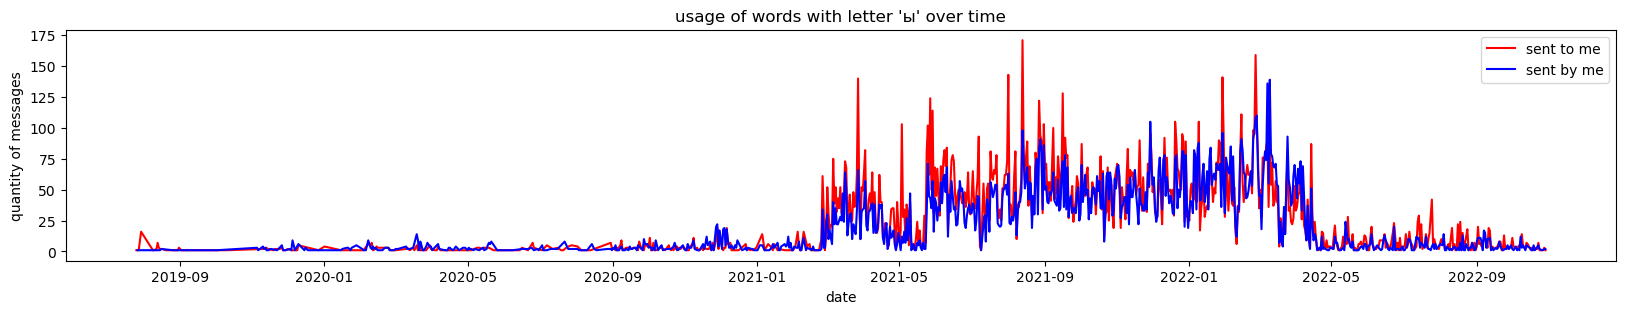

In [26]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['rus'] = df['message'].str.contains("ы")
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df1['rus']==1]
df3 = df2.groupby(['date1'])['message'].count()
df4 = df.loc[df["to_id"]==user_id]
df5 = df4.loc[df4['rus']==1]
df6 = df5.groupby(['date1'])['message'].count()
df6.name = "sent to me"
df3.name = "sent by me"
df6.plot(figsize=(20,3), color = 'red')
df3.plot(figsize=(20,3), color='blue', xlabel = 'date',ylabel = 'quantity of messages',title="usage of words with letter 'ы' over time")
plt.legend()

### 4. Comparing the usage of "і" to the usage of "ы" to see where the switch happened more precisely

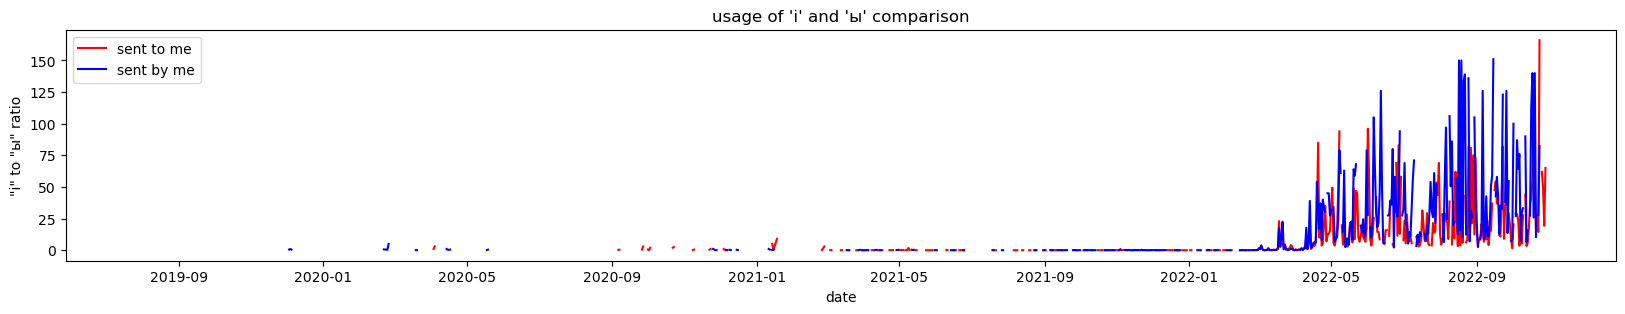

In [27]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['rus'] = df['message'].str.contains("ы")
df['ukr'] = df['message'].str.contains('і')
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df1['rus']==1]
df02 = df1.loc[df1['ukr']==1]
df3 = df2.groupby(['date1'])['message'].count()
df03 = df02.groupby(['date1'])['message'].count()
df00 = df03/df3 
df4 = df.loc[df["to_id"]==user_id]
df5 = df4.loc[df4['rus']==1]
df05 = df4.loc[df4['ukr']==1]
df6 = df5.groupby(['date1'])['message'].count()
df06 = df05.groupby(['date1'])['message'].count()
df01 = df06/df6

df01.name = "sent to me"
df00.name = "sent by me"
df01.plot(figsize=(20,3), color = 'red')
df00.plot(figsize=(20,3), color='blue', xlabel = 'date',ylabel = '"і" to "ы" ratio',title="usage of 'і' and 'ы' comparison")
plt.legend()

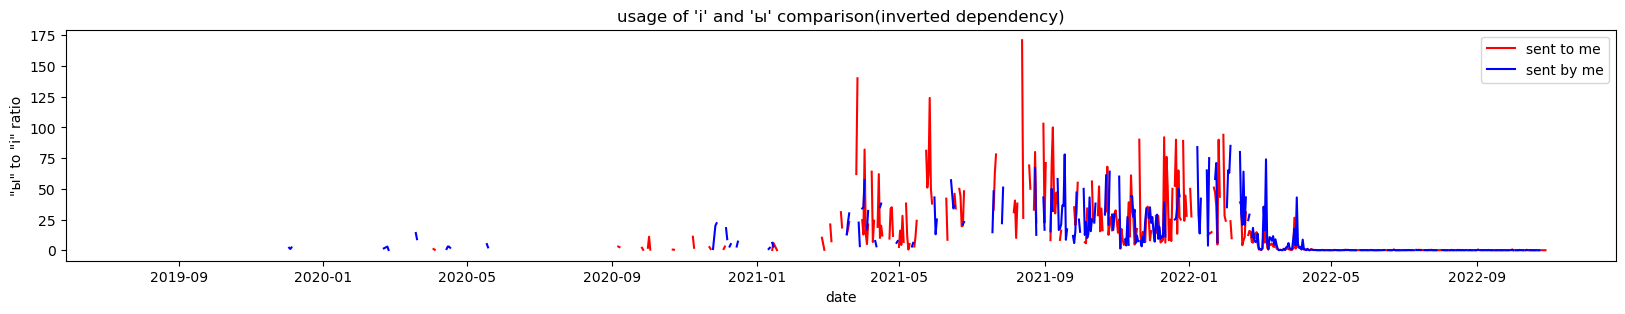

In [28]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['rus'] = df['message'].str.contains("ы")
df['ukr'] = df['message'].str.contains('і')
df1 = df.loc[df["from_id"]==peer_user_id]
df2 = df1.loc[df1['rus']==1]
df02 = df1.loc[df1['ukr']==1]
df3 = df2.groupby(['date1'])['message'].count()
df03 = df02.groupby(['date1'])['message'].count()
df00 = df3/df03 
df4 = df.loc[df["to_id"]==user_id]
df5 = df4.loc[df4['rus']==1]
df05 = df4.loc[df4['ukr']==1]
df6 = df5.groupby(['date1'])['message'].count()
df06 = df05.groupby(['date1'])['message'].count()
df01 = df6/df06

df01.name = "sent to me"
df00.name = "sent by me"
df01.plot(figsize=(20,3), color = 'red')
df00.plot(figsize=(20,3), color='blue', xlabel = 'date',ylabel = '"ы" to "і" ratio',title="usage of 'і' and 'ы' comparison(inverted dependency)")
plt.legend()

##### It is evident that the switch didn't happen immediately after the start of war. Additionally, on the last graph you can see that after starting studying in Mohylyanka I've started using Ukrainian consistently, this cannot be seen from any other graph. It can also be seen that I didn't switch to Ukrainian before Mohylyanka even though some people texted me in that language (evident by more consistent red lines in contrast to the blue ones

### 6. Changes in peak hours of activity

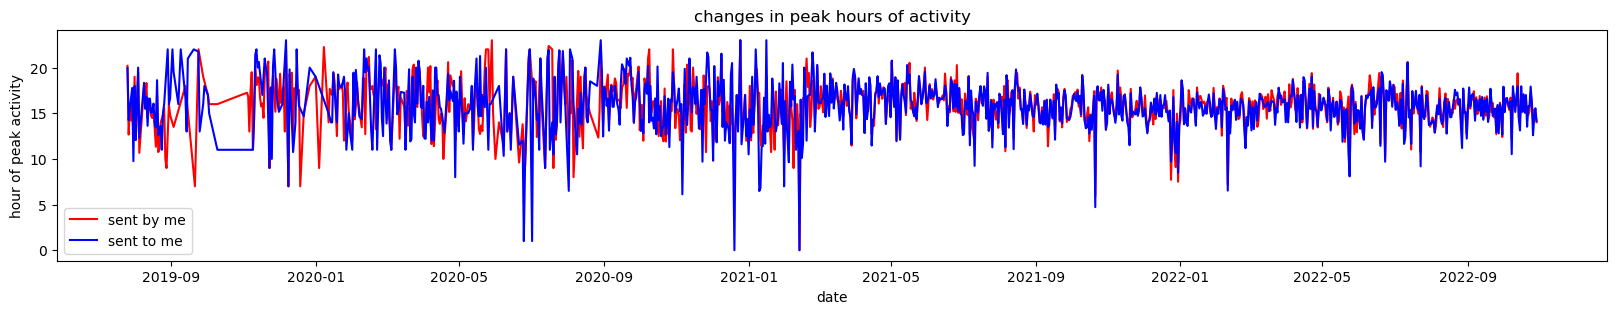

In [29]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['hour'] = pd.to_datetime(df['date']).dt.tz_convert(timezone).dt.hour
df1 = df.loc[df["from_id"]==peer_user_id]
s1 = df1.groupby(['date1'])['hour'].mean()
df2 = df.loc[df["to_id"]==user_id]
s2 = df2.groupby(['date1'])['hour'].mean()
s1.name = 'sent by me'
s2.name = 'sent to me'
s1.plot(figsize=(20,3), xlabel = 'date', ylabel = 'hour of peak activity',title ='changes in peak hours of activity', color = 'red')
s2.plot(figsize=(20,3), xlabel = 'date', ylabel = 'hour of peak activity', color = 'blue')
plt.legend()


##### It is apparent that I was much more inconsistent in my usage of Telegram before I've started talking to my gf. Can be explained by lack of communication in TG overal before 2021-01

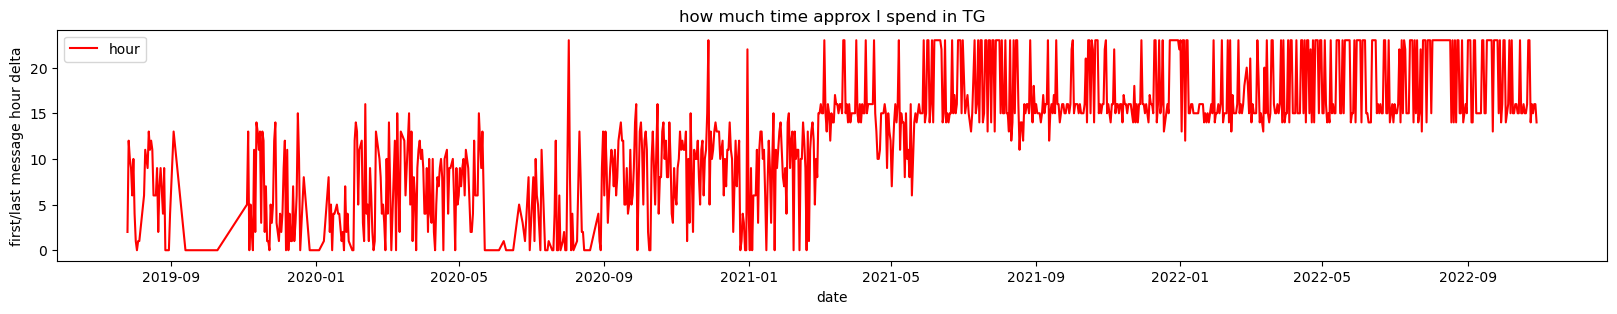

In [30]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['hour'] = pd.to_datetime(df['date']).dt.tz_convert(timezone).dt.hour
df1 = df.loc[df["from_id"]==peer_user_id]
s1 = df1.groupby(['date1'])['hour'].max()-df1.groupby(['date1'])['hour'].min()
s1.plot(figsize=(20,3), xlabel = 'date', ylabel = 'first/last message hour delta',title ='how much time approx I spend in TG', color = 'red')
plt.legend()

##### We can see how drasticaly the situation changed once i've started talking to a girl actively. The main difference: I've stopped ignoring people 


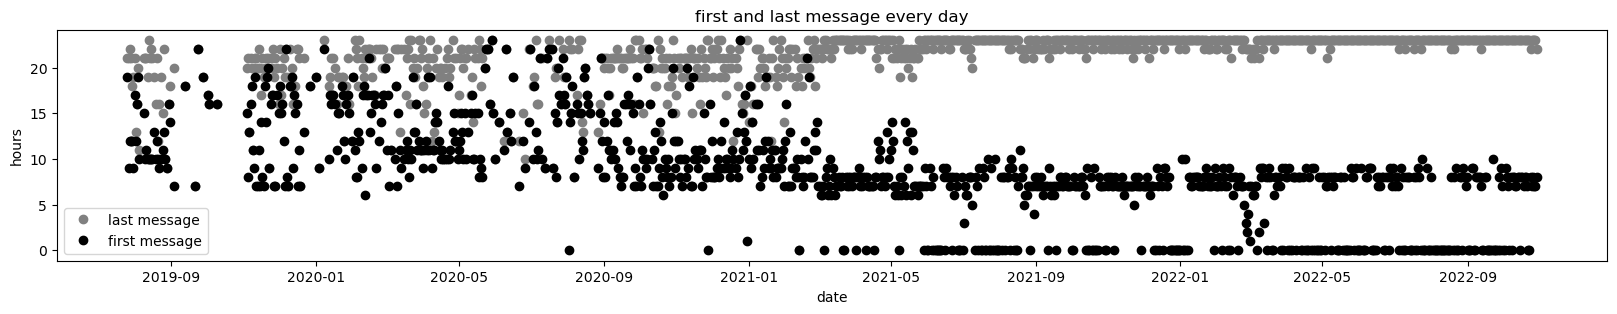

In [31]:
s1.name = "sent by me"
s2 = df1.groupby(['date1'])['hour'].max()
s2.name = "last message"
s3 = df1.groupby(['date1'])['hour'].min()
s3.name = 'first message'
s2.plot(figsize=(20,3),style = 'o', xlabel = 'date', ylabel = 'hours',title = 'first and last message every day', color = 'grey')
s3.plot(figsize=(20,3),style = 'o', xlabel = 'date', ylabel = 'hours', color = 'black')
plt.legend()

##### This graph pretty much sums up the thendencies I've described looking at the previous two

### 7. Checking if there is any correlation between quantity of messages in chat and the average amount of 'active' hours delta per day

#### For this part of my research, I'm going to give you both table and graph of top-10 dialogs by average 'active hours' delta, as it gives better understanding of the situation

,time spent per day in hrs,quantity of messages
dialog_id,,
296906023,23.000000,4
982712349,17.311419,115718
857250829,15.000000,114
420348467,11.500000,49
614520986,9.000000,12
607186206,8.000000,91
514231383,7.000000,8
-1001743461509,7.000000,66
538388769,7.000000,193


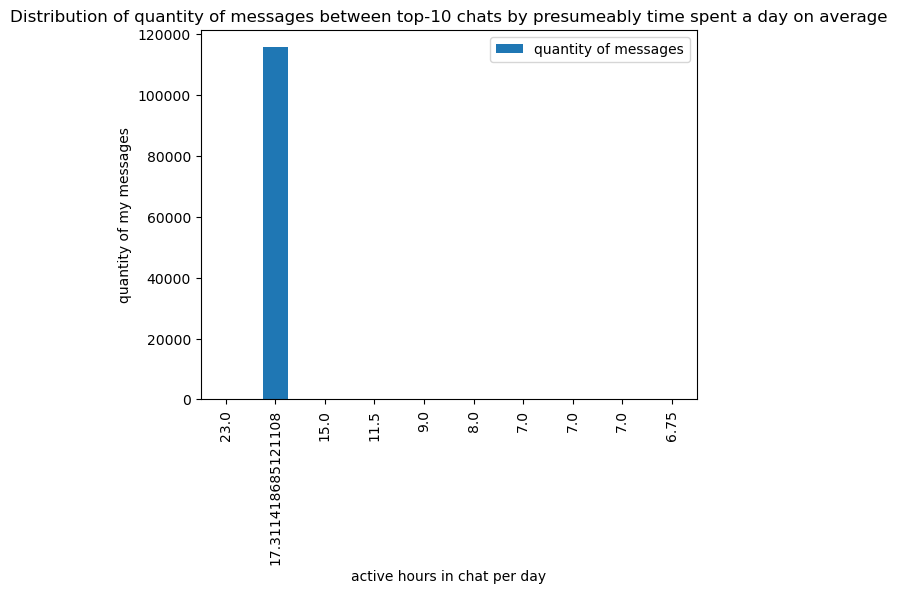

In [32]:
df['date1'] = pd.to_datetime(df['date']).dt.date
df['hour'] = pd.to_datetime(df['date']).dt.tz_convert(timezone).dt.hour
df1 = df.loc[df["from_id"]==peer_user_id]
s1 = df1.groupby(['date1','dialog_id'])['hour'].max()-df1.groupby(['date1','dialog_id'])['hour'].min()

s1 = s1.groupby(['dialog_id']).mean().sort_values(ascending = False).head(10)
s2 = df1.groupby(['dialog_id'])['id'].count()
df0 = pd.merge(s1, s2, on=['dialog_id'])
df0=df0.rename(columns={'hour': 'time spent per day in hrs', 'id':'quantity of messages'})
df0.plot(kind = 'bar', title = 'Distribution of quantity of messages between top-10 chats by presumeably time spent a day on average', x = 'time spent per day in hrs', y='quantity of messages', ylabel = 'quantity of my messages', xlabel = 'active hours in chat per day')
df0

##### It is evident that there is no clear dependency

### 8. Usage of cuss words in Ukrainian vs other languages

#### This one needs to be explained: the problem with identifying Russian and Ukrainian without using any dictionaries is that they are very similar in terms of letters. That is why I used different approach. If I throughout the specific day I've used more words with unique Ukrainian letters than with unique Russian letters in some specific dialogue, I consider this dialog on this day to be Ukrainian. The results are below

<AxesSubplot:title={'center':'distribution of cuss words between languages'}, xlabel='more Ukrainian in that dialog that day', ylabel='probability of messages with cuss words'>

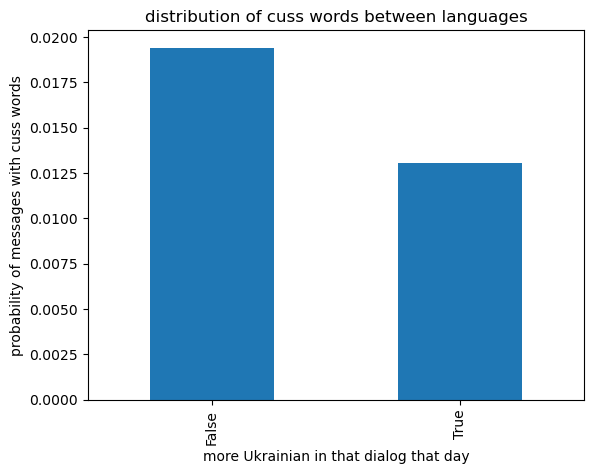

In [33]:
df['cuss'] = df['message'].str.contains(' блять|сука|хуй|пизд')
df['rus'] = df['message'].str.contains("ы|ъ|ё")
df['ukr'] = df['message'].str.contains("і|є|ї")
s1 = df.groupby(['date1','dialog_id'])['ukr'].sum()-df.groupby(['date1','dialog_id'])['rus'].sum()
s1.name = 'ukr-rus_msgs_delta'

s2 = df.groupby(['date1','dialog_id'])['cuss'].sum()
s2.name = 'msgs with cuss'
s3=df.groupby(['date1','dialog_id'])['id'].count()
df0 = pd.merge(s1, s2, on=['date1','dialog_id'])
df1 = pd.merge(df0, s3, on=['date1','dialog_id'])
df1['ukr_today'] = df1['ukr-rus_msgs_delta'] > 0
s = df1.groupby(['ukr_today'])['msgs with cuss'].sum()/df1.groupby(['ukr_today'])['id'].sum()
s.plot(kind = 'bar', ylabel = 'probability of messages with cuss words', xlabel = 'more Ukrainian in that dialog that day', title = 'distribution of cuss words between languages')


##### Possible explanation of result: the ammount of government channels I am subscribed to. Let's now check my own texts

<AxesSubplot:title={'center':'distribution of cuss words between languages (my messages only)'}, xlabel='more Ukrainian in that dialog that day', ylabel='probability of messages with cuss words'>

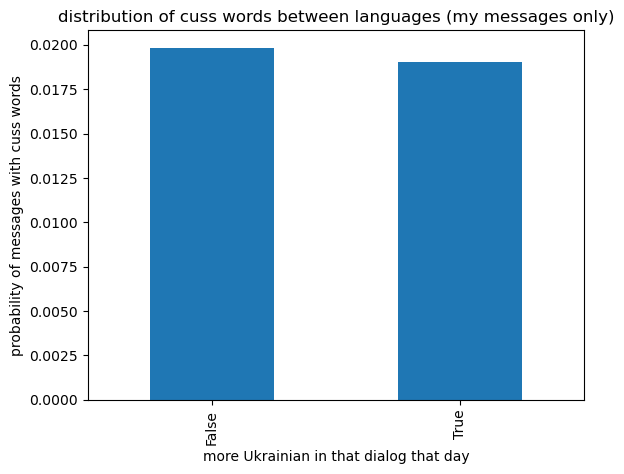

In [34]:
df['cuss'] = df['message'].str.contains(' блять|сука|хуй|пизд')
df['rus'] = df['message'].str.contains("ы|ъ|ё")
df['ukr'] = df['message'].str.contains("і|є|ї")
df0=df.loc[df['from_id']==peer_user_id]
s1 = df0.groupby(['date1','dialog_id'])['ukr'].sum()-df.groupby(['date1','dialog_id'])['rus'].sum()
s1.name = 'ukr-rus_msgs_delta'

s2 = df0.groupby(['date1','dialog_id'])['cuss'].sum()
s2.name = 'msgs with cuss'
s3=df0.groupby(['date1','dialog_id'])['id'].count()
df0 = pd.merge(s1, s2, on=['date1','dialog_id'])
df1 = pd.merge(df0, s3, on=['date1','dialog_id'])
df1['ukr_today'] = df1['ukr-rus_msgs_delta'] > 0
s = df1.groupby(['ukr_today'])['msgs with cuss'].sum()/df1.groupby(['ukr_today'])['id'].sum()
s.plot(kind = 'bar', ylabel = 'probability of messages with cuss words', xlabel = 'more Ukrainian in that dialog that day', title = 'distribution of cuss words between languages (my messages only)')


##### So the language didn't change my usage of cuss words at all. I would love to see the results of this test with datasets of others

### Conclusion:

##### During my work I've debunked a few false ideas of mine about my behaviour in TG and the behaviour of others. I've made some improvements both in quality of my research and in its presentation, and got interesting results on some topics. However, the technical limitations (lack of programming experience overall) takes its toll and I cannot realize some of my ideas.